# Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [2]:
df=pd.read_csv('USA_Housing.csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# Understanding the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# Data Preprocessing

In [6]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [7]:
# Remove the extra space from column names

df = df.rename(columns=lambda x: x.replace('.',''))

In [8]:
df.columns

Index(['Avg Area Income', 'Avg Area House Age', 'Avg Area Number of Rooms',
       'Avg Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# Exploratory Data Analysis

C:\Users\my\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Life expectancy Distribution Plot'}, xlabel='Price', ylabel='Density'>

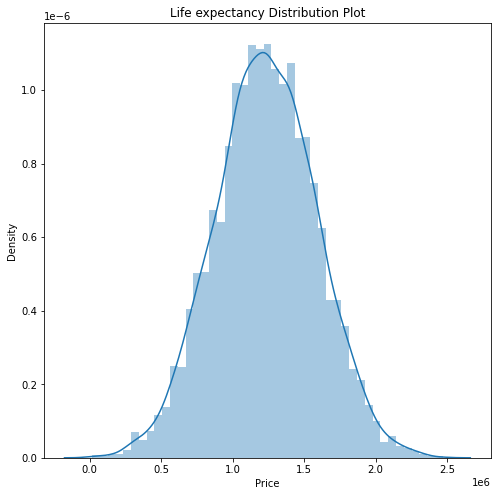

In [9]:
plt.figure(figsize=(8,8))
plt.title('Price Distribution Plot')
sns.distplot(df['Price'])

In [10]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Avg Area Income', 'Avg Area House Age', 'Avg Area Number of Rooms',
       'Avg Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')
Categorical columns: 
 Index(['Address'], dtype='object')


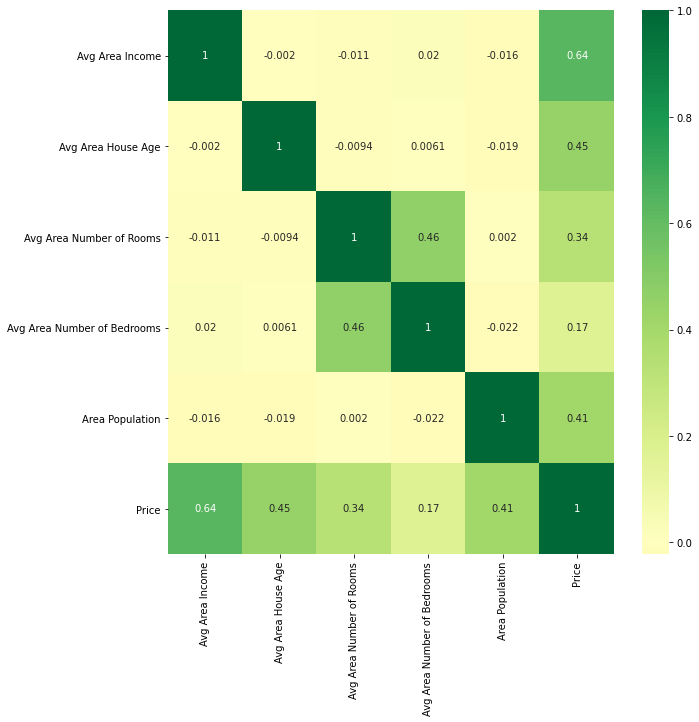

In [11]:
# Let's check the multicollinearity of features by checking the correlation matric

plt.figure(figsize=(10,10))
p=sns.heatmap(df[num_col].corr(), annot=True,cmap='RdYlGn',center=0)

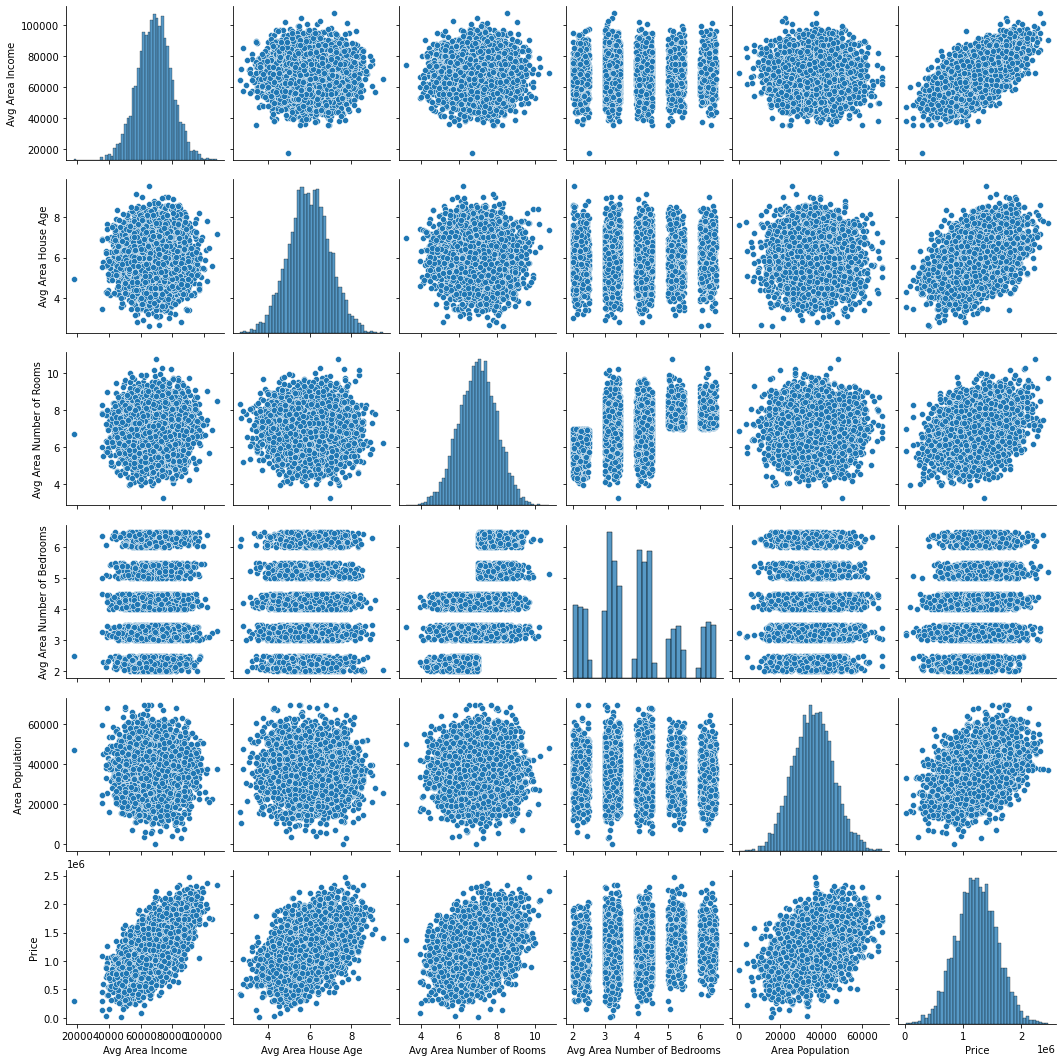

In [12]:
# Pair Plots to know the relation between different features
ax = sns.pairplot(df[num_col])

# Model Building

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x=df.drop(columns=['Price','Address'])
y=df[['Price']]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1234)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression()


#from sklearn import linear_model
#model = linear_model.

lm.fit(x_train, y_train)
ypred= lm.predict(x_test)

In [18]:
lm.intercept_

array([-2646549.2062085])

Text(0, 0.5, 'Predicted Y')

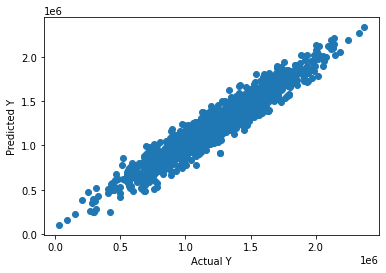

In [19]:
plt.scatter(y_test, ypred)
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")

# Model Evaluation

C:\Users\my\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

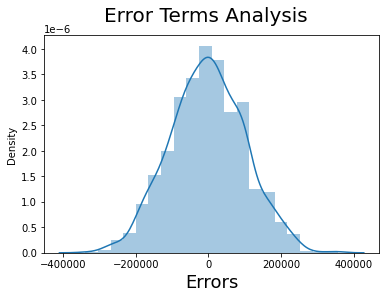

In [20]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - ypred), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

In [21]:
from sklearn import metrics

In [22]:
print("mean_absolute_error(MAE) : ", metrics.mean_absolute_error(y_test, ypred))
print("mean_squared_error(MSE) : ", metrics.mean_squared_error(y_test, ypred))
print("root_mean_squared_error (RMSE): ", np.sqrt(metrics.mean_squared_error(y_test, ypred)))

print("r2_score(r-squared): ", metrics.r2_score(y_test, ypred))

mean_absolute_error(MAE) :  82171.93658431634
mean_squared_error(MSE) :  10603499972.372662
root_mean_squared_error (RMSE):  102973.29737544905
r2_score(r-squared):  0.9176785596254428


# RFE and VIF

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

In [28]:
rfe = RFE(lm, 5)
rfe = rfe.fit(x_train, y_train)

C:\Users\my\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [31]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Avg Area Income', True, 1),
 ('Avg Area House Age', True, 1),
 ('Avg Area Number of Rooms', True, 1),
 ('Avg Area Number of Bedrooms', True, 1),
 ('Area Population', True, 1)]

In [32]:
imp_columns = x_train.columns[rfe.support_]

In [33]:
x_train_rfe = x_train[imp_columns]

In [35]:
vif_data = pd.DataFrame()
vif_data["feature"] = x_train_rfe.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_train_rfe.values, i)
                          for i in range(x_train_rfe.shape[1])]
  
vif_data

,feature,VIF
0,Avg Area Income,29.575571
1,Avg Area House Age,27.374885
2,Avg Area Number of Rooms,44.864705
3,Avg Area Number of Bedrooms,14.612715
4,Area Population,12.930825


# VIF With p value

In [36]:
from sklearn.feature_selection import f_regression


In [37]:
f_regression(x_train,y_train)

C:\Users\my\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(array([2402.05911275,  890.97705996,  421.11022019,  107.9162535 ,
         688.02874255]),
 array([0.00000000e+000, 1.32791456e-174, 1.85913562e-088, 6.43460850e-025,
        1.34973724e-138]))

In [38]:
p_values=f_regression(x_train,y_train)[1]

C:\Users\my\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [45]:
vif_data_pvalue=vif_data
vif_data_pvalue['p_value']=p_values.round(4)

In [46]:
vif_data_pvalue

,feature,VIF,p_value
0,Avg Area Income,29.575571,0.0
1,Avg Area House Age,27.374885,0.0
2,Avg Area Number of Rooms,44.864705,0.0
3,Avg Area Number of Bedrooms,14.612715,0.0
4,Area Population,12.930825,0.0


# Model With KN Regressor

In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [49]:
knr=KNeighborsRegressor(n_neighbors=5)

In [50]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [51]:
k_ypred=knr.predict(x_test)

# Model Evaluation

In [52]:
print("mean_absolute_error(MAE) : ", metrics.mean_absolute_error(y_test, k_ypred))
print("mean_squared_error(MSE) : ", metrics.mean_squared_error(y_test, k_ypred))
print("root_mean_squared_error (RMSE): ", np.sqrt(metrics.mean_squared_error(y_test, k_ypred)))

print("r2_score(r-squared): ", metrics.r2_score(y_test, k_ypred))

mean_absolute_error(MAE) :  203426.83704130223
mean_squared_error(MSE) :  63924819213.985855
root_mean_squared_error (RMSE):  252833.58007587888
r2_score(r-squared):  0.5037126225218477


Seems not good as compare to Linear Regression lets find best neighbor

# choosing best Neighbor

In [77]:
rmse_val = [] #to store rmse values for different k
for K in range(1,100,10):
    K = K+5
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = np.sqrt(metrics.mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  6 is: 248579.66625576437
RMSE value for k=  16 is: 238322.3947784862
RMSE value for k=  26 is: 235373.91860258742
RMSE value for k=  36 is: 233508.21462680487
RMSE value for k=  46 is: 233161.54802985565
RMSE value for k=  56 is: 232877.30659412994
RMSE value for k=  66 is: 232752.78560434564
RMSE value for k=  76 is: 232550.49682708966
RMSE value for k=  86 is: 232807.96742214554
RMSE value for k=  96 is: 233069.1526687242


Text(0, 0.5, 'RMSE')

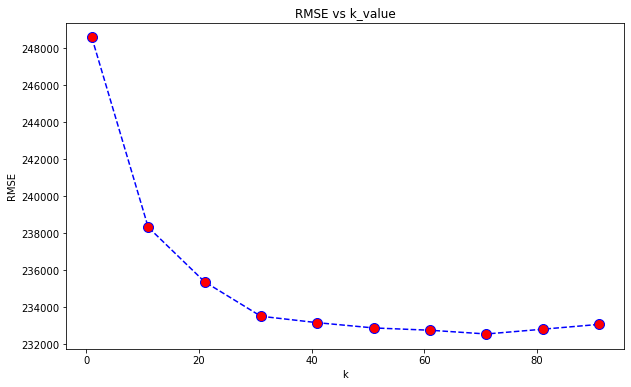

In [80]:
#plotting the rmse values against k values
plt.figure(figsize=(10,6))
plt.plot(range(1,100,10),rmse_val,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('RMSE vs k_value')
plt.xlabel('k')
plt.ylabel('RMSE')

Somewhere around k=70 model is good

In [85]:
knr1=KNeighborsRegressor(n_neighbors=76)
knr1.fit(x_train,y_train)
k_ypred1=knr1.predict(x_test)

In [86]:
print("mean_absolute_error(MAE) : ", metrics.mean_absolute_error(y_test, k_ypred1))
print("mean_squared_error(MSE) : ", metrics.mean_squared_error(y_test, k_ypred1))
print("root_mean_squared_error (RMSE): ", np.sqrt(metrics.mean_squared_error(y_test, k_ypred1)))

print("r2_score(r-squared): ", metrics.r2_score(y_test, k_ypred1))

mean_absolute_error(MAE) :  186003.45504722086
mean_squared_error(MSE) :  54079733574.52624
root_mean_squared_error (RMSE):  232550.49682708966
r2_score(r-squared):  0.580146029657495


# SO HERE WE CAN EASILY SEE LINEAR REGRESSION IS BETTER THAN KNEIGHBORS REGRESSOR

# 